# Supervised Machine Learning Examples
Some examples of supervised machine learning examples in Python.
First, load up a ton of modules...

In [34]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
pd.options.mode.chained_assignment = None

##  Load the data
Next, we have to load the data into a dataframe.  In order to have a balanced dataset, we will use 10000 records from Alexa which will represent the not malicious domains, and 10000 records from `gameoverdga` representing the malicious domains.  

You can see that at the end we have 10000 of each.

In [2]:
df = pd.read_csv( '../../data/dga-full.csv' )
#Filter to alexo and game over
df = df[df['dsrc'].isin(['alexa','gameoverdga'])]
df.dsrc.value_counts()

alexa          10000
gameoverdga    10000
Name: dsrc, dtype: int64

## Add a Target Column
For our datasets, we need a numeric column to represent the classes.  In our case we are going to call the column `isMalicious` and assign it a value of `0` if it is not malicious and `1` if it is.

In [3]:
df['isMalicious'] = df['dsrc'].apply( lambda x: 0 if x == "alexa" else 1 )

## Perform the Train/Test Split
For this, let’s create a rather small training data se as it will reduce the time to train up a model.
Feel free to try a 15%, 20% or even a 30% portion for the training data (lower percentages for slower machines).

In this example, we will split 30% for train and 70% for test.

Normally you would want most of the data in the training data, but more training data can considerably extend the time neede to train up a model.

We're also going to need a list of column names for the feature columns as well as the target column. 

In [39]:
train, test = train_test_split(df, test_size = 0.7)
features = ['length', 'dicts', 'entropy','numbers', 'ngram']
target = 'isMalicious'

## Create the Classifiers
The next step is to create the classifiers. What you'll see is that scikit-learn maintains a constant interface for every machine learning algorithm.  For a supervised model, the steps are:
1.  Create the classifier object
2.  Call the `.fit()` method with the training data set and the target 
3.  To make a prediction, call the `.predict()` method

In [42]:
#Create the Random Forest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=10, 
                             max_depth=None, 
                             min_samples_split=2, 
                             random_state=0)

random_forest_clf = random_forest_clf.fit( train[features], train[target])

In [40]:
#Next, create the SVM classifier
svm_classifier = svm.SVC()
svm_classifier = svm_classifier.fit(train[features], train[target])  

## Comparing the Classifiers
Now that we have two different classifiers, let's compare them and see how they perform. Fortunately, Scikit has a series of functions to generate metrics for you.  The first is the cross validation score.

In [44]:
scores = cross_val_score(random_forest_clf, train[features], train[target])
scores.mean()

1.0

We'll need to to get the predictions from both classifiers, so we add columns to the test and training sets for the predictions.

In [46]:
test['predictions'] = random_forest_clf.predict( test[features] )
train['predictions'] = random_forest_clf.predict( train[features] )
test['svm-predictions'] = svm_classifier.predict( test[features])
train['svm-predictions'] = svm_classifier.predict( train[features])

In [47]:
test.head()

,dsrc,domain,length,dicts,entropy,numbers,ngram,isMalicious,predictions,svm-predictions
21295,gameoverdga,qff3vb1xdu1qfym25w01qhx6r9,26,0.000000,4.074876,9,0.000000,1,1,1
42736,alexa,digitalocean,12,1.000000,3.251629,0,17.745319,0,0,0
46157,alexa,manuscriptcentral,17,1.000000,3.499228,0,21.640531,0,0,0
13538,gameoverdga,beialx1qm4flb1e92284pxlsyc,26,0.384615,4.056021,8,1.301030,1,1,1
18081,gameoverdga,muwh97a5egf01yb07qhxdxtco,25,0.160000,4.323856,7,1.041393,1,1,1


## Confusion Matrix
These are a little confusing (yuk yuk), but are a very valuable tool in evaluating your models.  Scikit-learn has a function to generate a confusion matrix as shown below.

In [48]:
confusion_matrix( test['isMalicious'], test['predictions'])

array([[6956,    1],
       [   0, 7043]])

The code below generates a nicer presentation of the confusion matrix for the random forest classifer.

From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

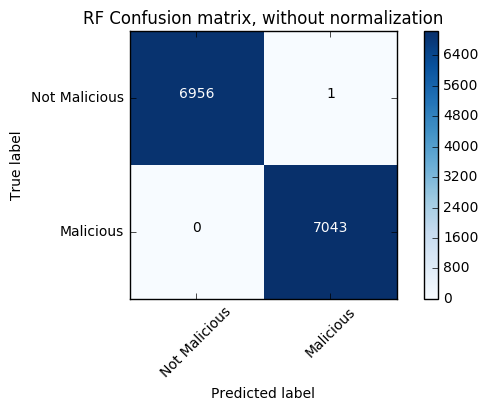

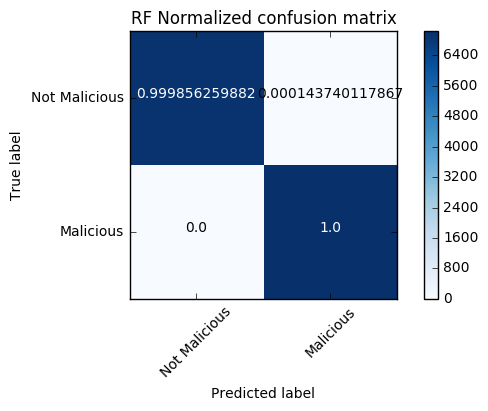

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix( test['isMalicious'], test['predictions'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Malicious', 'Malicious'],
                      title='RF Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Malicious', 'Malicious'], normalize=True,
                      title='RF Normalized confusion matrix')

plt.show()

And again for the SVM classifier.

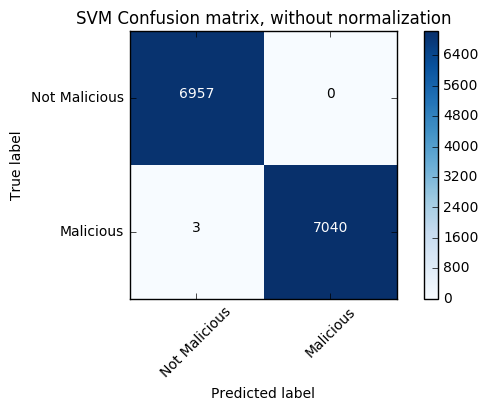

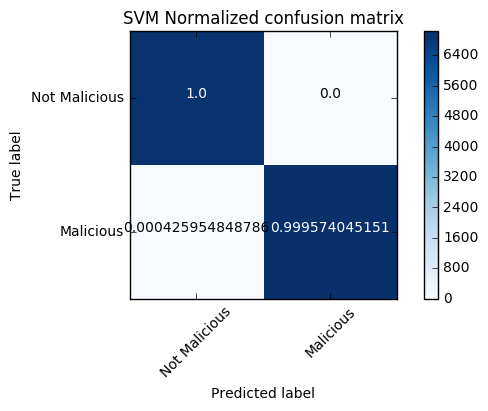

In [49]:
# Compute confusion matrix
svm_cnf_matrix = confusion_matrix( test['isMalicious'], test['svm-predictions'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cnf_matrix, classes=['Not Malicious', 'Malicious'],
                      title='SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cnf_matrix, classes=['Not Malicious', 'Malicious'], normalize=True,
                      title='SVM Normalized confusion matrix')

plt.show()

## Feature Importance
Random Forest has a feature which can calculate the importance for each feature it uses in building the forest.  This can be calculated with  this property:`random_forest_clf.feature_importances_`.

In [52]:
importances = random_forest_clf.feature_importances_

In [21]:
importances

array([ 0.3 ,  0.08,  0.41,  0.2 ,  0.01])

You can also visualize this with the following code from: #From: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature ranking:
1. feature 2 (0.410171)
2. feature 0 (0.304949)
3. feature 3 (0.197083)
4. feature 1 (0.082497)
5. feature 4 (0.005300)


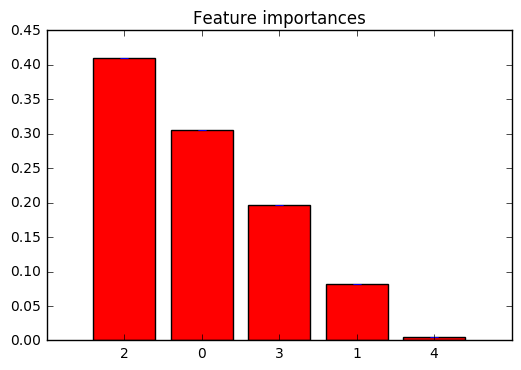

In [25]:
std = np.std([random_forest_clf.feature_importances_ for tree in random_forest_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(test[features].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(test[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(test[features].shape[1]), indices)
plt.xlim([-1, test[features].shape[1]])
plt.show()

You can calculate the accuracy with the `metrics.accuracy()` method, and finally, there is the `metrics.classification-report()` which will calculate all the metrics except accuracy at once.

In [56]:
pscore = metrics.accuracy_score(test['isMalicious'], test['predictions'])
pscore_train = metrics.accuracy_score(train['isMalicious'], train['predictions'])

In [57]:
print( metrics.classification_report(test['isMalicious'], test['predictions'], target_names=['Malicious', 'Not Malicious'] ) )

               precision    recall  f1-score   support

    Malicious       1.00      1.00      1.00      6957
Not Malicious       1.00      1.00      1.00      7043

  avg / total       1.00      1.00      1.00     14000



In [58]:
svm_pscore = metrics.accuracy_score(test['isMalicious'], test['svm-predictions'])
svm_pscore_train = metrics.accuracy_score(train['isMalicious'], train['svm-predictions'])
print( metrics.classification_report(test['isMalicious'], test['svm-predictions'], target_names=['Malicious', 'Not Malicious'] ) )

               precision    recall  f1-score   support

    Malicious       1.00      1.00      1.00      6957
Not Malicious       1.00      1.00      1.00      7043

  avg / total       1.00      1.00      1.00     14000



In [59]:
print( svm_pscore, svm_pscore_train)

0.999785714286 1.0


In [60]:
print( pscore, pscore_train)

0.999928571429 1.0
